<a href="https://colab.research.google.com/github/HackersMatter/EEG-Analysis/blob/main/Data_convert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Understanding Data**

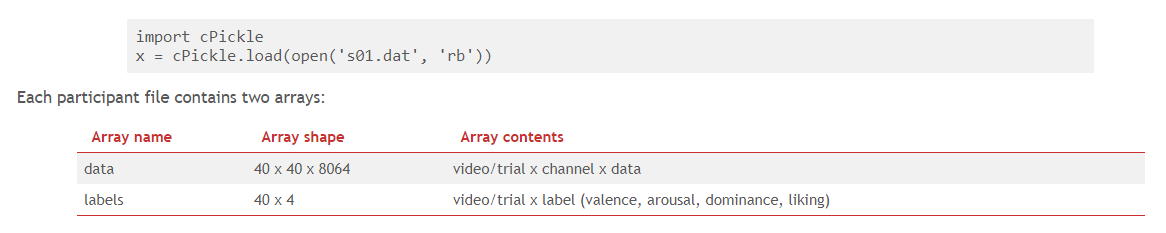

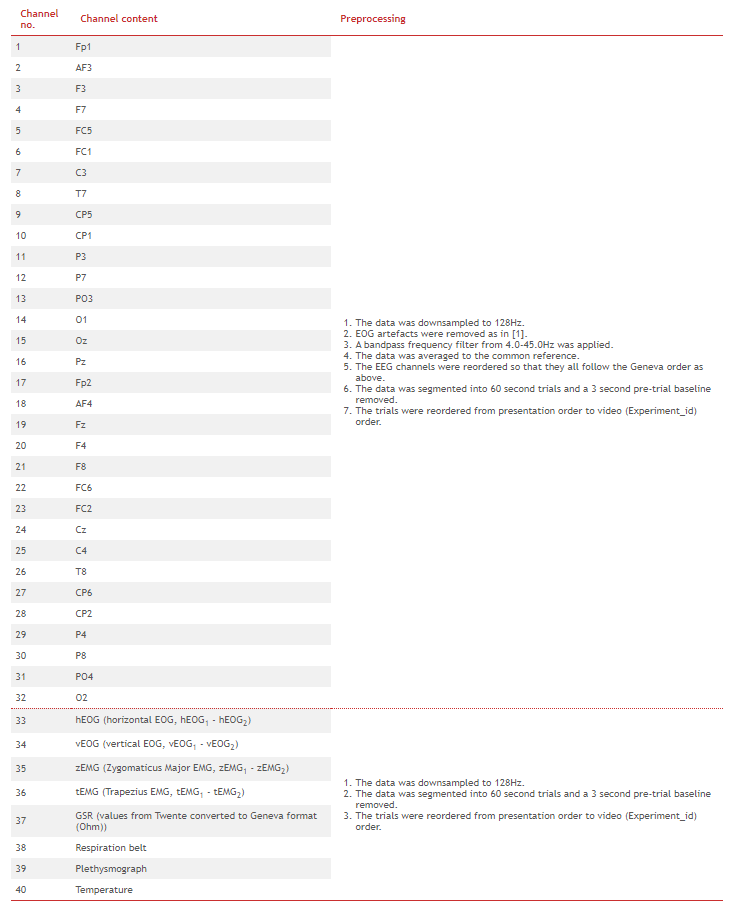

In [1]:
try:
    import cPickle as pickle
except:
    import pickle
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
x = pickle.load(open('/content/drive/MyDrive/Project/DEAP_project/DEAP/s01.dat', 'rb'), encoding='latin1')

In [3]:
print(x)
print(x.keys())

{'labels': array([[7.71, 7.6 , 6.9 , 7.83],
       [8.1 , 7.31, 7.28, 8.47],
       [8.58, 7.54, 9.  , 7.08],
       [4.94, 6.01, 6.12, 8.06],
       [6.96, 3.92, 7.19, 6.05],
       [8.27, 3.92, 7.  , 8.03],
       [7.44, 3.73, 7.08, 7.04],
       [7.32, 2.55, 6.32, 5.87],
       [4.04, 3.29, 3.62, 5.99],
       [1.99, 4.86, 2.04, 7.09],
       [2.99, 2.36, 3.63, 6.24],
       [2.71, 2.77, 3.4 , 7.35],
       [1.95, 3.12, 2.87, 6.18],
       [4.18, 2.24, 3.04, 5.04],
       [3.17, 8.08, 2.91, 5.04],
       [6.81, 7.44, 8.15, 7.14],
       [2.46, 6.91, 6.77, 6.41],
       [7.23, 7.15, 6.94, 8.01],
       [7.17, 8.  , 8.1 , 6.79],
       [8.26, 7.91, 7.19, 8.13],
       [9.  , 7.95, 8.37, 7.86],
       [7.09, 2.08, 7.06, 7.37],
       [8.15, 3.01, 7.37, 7.9 ],
       [7.04, 7.09, 8.01, 8.22],
       [8.86, 7.21, 8.65, 7.21],
       [7.28, 7.27, 7.41, 8.24],
       [7.35, 6.95, 7.03, 7.29],
       [3.88, 3.35, 4.01, 7.87],
       [1.36, 2.27, 3.  , 8.14],
       [2.08, 2.99, 3.22, 7.33],

In [4]:
print(x['labels'].shape)
print(x['labels'][0])

(40, 4)
[7.71 7.6  6.9  7.83]


In [5]:
print(x['data'].shape)
print(x['data'][0])

(40, 40, 8064)
[[ 9.48231681e-01  1.65333533e+00  3.01372577e+00 ... -2.82648937e+00
  -4.47722969e+00 -3.67692812e+00]
 [ 1.24706590e-01  1.39008270e+00  1.83509881e+00 ... -2.98702069e+00
  -6.28780884e+00 -4.47429041e+00]
 [-2.21651099e+00  2.29201682e+00  2.74636923e+00 ... -2.63707760e+00
  -7.40651010e+00 -6.75590441e+00]
 ...
 [ 2.30779684e+02  6.96716323e+02  1.19512165e+03 ...  1.01080949e+03
   1.28312149e+03  1.51996480e+03]
 [-1.54180981e+03 -1.61798052e+03 -1.69268642e+03 ... -1.57842691e+04
  -1.57823160e+04 -1.57808512e+04]
 [ 6.39054310e-03  6.39054310e-03  6.39054310e-03 ... -9.76081241e-02
  -9.76081241e-02 -9.76081241e-02]]


In [6]:
nLabel, nTrial, nUser, nChannel, nTime  = 4, 40, 32, 32, 8064
chan = ['Fp1','AF3','F3','F7','FC5','FC1','C3','T7','CP5','CP1','P3','P7','PO3','O1','Oz','Pz','Fp2','AF4','Fz','F4','F8','FC6','FC2','Cz','C4','T8','CP6','CP2','P4','P8','PO4','O2']

In [10]:
fout_data = open("/content/drive/MyDrive/Project/DEAP_project/features.csv",'w')
fout_labels0 = open("/content/drive/MyDrive/Project/DEAP_project/labels_0.csv",'w')
fout_labels1 = open("/content/drive/MyDrive/Project/DEAP_project/labels_1.csv",'w')
fout_labels2 = open("/content/drive/MyDrive/Project/DEAP_project/labels_2.csv",'w')
fout_labels3 = open("/content/drive/MyDrive/Project/DEAP_project/labels_3.csv",'w')

In [11]:
for ch in chan:
    if ch == 'O2':
        fout_data.write(ch + "\n")
    else:
        fout_data.write(ch + ",")
fout_labels0.write("Label_0\n")
fout_labels1.write("Label_1\n")
fout_labels2.write("Label_2\n")
fout_labels3.write("Label_3\n")
for i in range(1,nUser+1):
    if i < 10:
        fname = "/content/drive/MyDrive/Project/DEAP_project/DEAP/s0"+str(i)+".dat"
    else:
        fname = "/content/drive/MyDrive/Project/DEAP_project/DEAP/s"+str(i)+".dat" 
    x = pickle.load(open(fname, 'rb'), encoding='latin1')
    print(fname)
    for tr in range(nTrial):
        for dat in range(nTime):  
            if dat % 8 == 0: 
                for ch in range(nChannel):
                    if ch < 31:
                        fout_data.write(str(x['data'][tr][ch][dat]) + ",")
                    else:
                        fout_data.write(str(x['data'][tr][ch][dat]) + "\n")
        fout_labels0.write(str(x['labels'][tr][0]) + "\n")
        fout_labels1.write(str(x['labels'][tr][1]) + "\n")
        fout_labels2.write(str(x['labels'][tr][2]) + "\n")
        fout_labels3.write(str(x['labels'][tr][3]) + "\n")
        fout_data.write("\n")

/content/drive/MyDrive/Project/DEAP_project/DEAP/s01.dat
/content/drive/MyDrive/Project/DEAP_project/DEAP/s02.dat
/content/drive/MyDrive/Project/DEAP_project/DEAP/s03.dat
/content/drive/MyDrive/Project/DEAP_project/DEAP/s04.dat
/content/drive/MyDrive/Project/DEAP_project/DEAP/s05.dat
/content/drive/MyDrive/Project/DEAP_project/DEAP/s06.dat
/content/drive/MyDrive/Project/DEAP_project/DEAP/s07.dat
/content/drive/MyDrive/Project/DEAP_project/DEAP/s08.dat
/content/drive/MyDrive/Project/DEAP_project/DEAP/s09.dat
/content/drive/MyDrive/Project/DEAP_project/DEAP/s10.dat
/content/drive/MyDrive/Project/DEAP_project/DEAP/s11.dat
/content/drive/MyDrive/Project/DEAP_project/DEAP/s12.dat
/content/drive/MyDrive/Project/DEAP_project/DEAP/s13.dat
/content/drive/MyDrive/Project/DEAP_project/DEAP/s14.dat
/content/drive/MyDrive/Project/DEAP_project/DEAP/s15.dat
/content/drive/MyDrive/Project/DEAP_project/DEAP/s16.dat
/content/drive/MyDrive/Project/DEAP_project/DEAP/s17.dat
/content/drive/MyDrive/Project/

In [12]:
fout_labels0.close()
fout_labels1.close()
fout_labels2.close()
fout_labels3.close()
fout_data.close()

In [ ]:
import pandas as pd
y = pd.read_csv('/content/drive/MyDrive/Project/DEAP_Project/features.csv')

In [ ]:
y

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,P3,P7,PO3,O1,Oz,Pz,Fp2,AF4,Fz,F4,F8,FC6,FC2,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2
0,0.948232,0.124707,-2.216511,1.005734,5.095919,1.206457,3.866461,1.861664,3.689008,1.319819,6.273332,5.935532,4.237346,2.979356,2.026299,0.038025,-1.757478,1.293004,-3.263385,-3.045949,-3.076912,-3.568071,-0.548677,-1.371221,-4.726737,-1.875302,-5.650255,-4.108091,-2.270057,-3.557186,-1.237332,0.372271
1,1.653335,1.390083,2.292017,1.297927,5.000869,0.599485,3.280028,7.190648,4.701009,-3.853227,3.179227,9.930117,4.257641,6.913968,3.919034,-1.497226,-2.452162,-0.698662,-1.664465,-2.326356,-4.343487,-5.817701,-0.137914,-4.653093,-8.181340,-4.465371,-6.247404,-5.307804,-3.833680,-1.260306,-0.941383,2.076195
2,3.013726,1.835099,2.746369,2.367689,4.176166,0.869299,0.656367,5.906498,1.712879,-6.444708,0.130854,7.360241,2.816966,4.848886,5.002279,-3.775446,1.114575,2.219004,0.060857,-1.778300,-2.189333,-3.671201,-0.252272,-4.519923,-6.856080,-4.639041,-7.388027,-4.743330,-2.973738,-3.099620,1.028047,4.465219
3,1.495061,-1.110738,-2.364459,-0.231850,0.354056,1.974166,-3.077413,-3.653504,-4.312704,-5.469621,-0.691284,1.168613,0.106961,0.317107,4.994155,-2.483821,3.836608,5.962018,0.846696,-1.627723,0.131692,0.140277,0.685711,-0.132148,-1.742958,0.121536,-3.770098,-1.408069,1.555132,-1.586031,4.054683,5.917947
4,-1.264836,-2.590622,-2.309528,-1.662444,-4.154098,-0.091352,-2.857734,-1.045527,-4.377870,-2.554392,-2.332911,-0.271243,-1.012850,-0.734943,2.286390,0.780246,2.431129,-0.353391,0.029623,-0.907439,0.338294,-0.182771,-1.605383,1.839121,1.246979,2.417382,2.829848,1.104115,2.644244,3.887943,3.616070,4.857952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321915,2.371097,6.525279,-1.470521,-2.535683,-8.222570,-2.062185,-5.890198,11.508550,-14.298769,9.859735,-10.549934,-2.210352,5.975073,-10.145621,0.286391,10.705542,-0.064252,-3.197520,3.865937,-13.637673,0.914621,11.677199,68.066378,0.407407,-0.032451,12.929205,-27.406610,-14.864499,-6.631102,7.509646,-25.823920,-3.558200
10321916,5.408372,7.813431,-5.203169,-13.254773,-18.839062,-1.866768,-8.164257,17.100103,-23.600410,27.898805,-16.475332,4.870747,25.844527,-12.142764,0.248693,26.340773,-3.971175,-13.707140,14.165128,-30.052649,-5.780710,11.109275,146.337550,3.976006,6.957139,11.972493,-52.080426,-29.577173,-11.663913,5.416705,-57.219852,-11.860173
10321917,-1.308237,1.166170,-3.158261,-9.249685,-7.438499,0.591557,-1.791961,16.107009,-9.831608,17.049193,-6.020875,7.082500,18.173194,-2.549559,2.841009,16.346753,-4.788650,-7.171499,7.959863,-16.956219,-5.194197,1.646491,76.812473,3.080318,3.275846,-22.535264,-26.538050,-15.409645,-4.558339,4.718691,-28.783795,-3.566724
10321918,-2.095682,4.284166,-6.136204,-4.000436,-11.495979,-2.753036,-7.090403,5.933243,-13.990339,11.807037,-3.016989,8.631135,19.304671,1.441575,6.032944,13.873761,-3.385266,-1.843872,2.300400,-15.492710,0.240902,13.023555,70.180341,0.583702,-1.521174,-12.615231,-26.169920,-16.098081,-6.099934,7.850973,-28.039497,-3.643652


In [ ]:
z = pd.read_csv('/content/drive/MyDrive/Project/DEAP_Project/labels_1.csv')
z

,Label_1
0,7.60
1,7.31
2,7.54
3,6.01
4,3.92
...,...
1275,6.96
1276,6.13
1277,7.01
1278,7.17
